In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy

pd.set_option('display.max_columns', 500)

from IPython.display import display

from sklearn.metrics import accuracy_score
import itertools


In [183]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    tempmatch = pd.read_sql_query("SELECT * from Match", con)
    player=pd.read_sql_query("Select * from player",con)
    player_att=pd.read_sql_query("Select * from player_attributes",con)
    team_att=pd.read_sql_query("Select * from team attributes",con)
    matches3 = matches2 = matches
    playeratt = pd.read_sql_query("SELECT * from player inner join player_attributes using (player_fifa_api_id) ", con)

In [44]:
#First we will to select the countries of interest for our analysis. 
#I am selecting England, Germany and Spain as these are the most popular and most watched leagues in football. 
#These leagues are the most competitive league and it would give better understanding of the game.

main_countries =['England','Spain','Italy','France','Germany','Portugal','Netherlands']
countries=countries[countries.name.isin(main_countries)]
leagues=countries.merge(leagues,on='id',suffixes=('', '_y'))
leagues



,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,13274,Netherlands,13274,Netherlands Eredivisie
5,17642,Portugal,17642,Portugal Liga ZON Sagres
6,21518,Spain,21518,Spain LIGA BBVA


In [45]:
leagues.rename(columns={'name_y':'League_name'})
seasons = matches.season.unique()


In [46]:
#Merging the corresponding league with their matches
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches.dropna(inplace=True)
req_matches.head()


,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
1728,1729,1729,10260,10261,1,1,2008/2009,2
1729,1730,1729,9825,8659,1,0,2008/2009,1
1730,1731,1729,8472,8650,0,1,2008/2009,1
1731,1732,1729,8654,8528,2,1,2008/2009,3
1732,1733,1729,10252,8456,4,2,2008/2009,6


In [47]:
def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


In [51]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"].groupby('season')
spanish = new_matches[new_matches.name == "Spain"].groupby('season')
german = new_matches[new_matches.name == "Germany"].groupby('season')
italy=new_matches[new_matches.name=='Italy'].groupby('season')
france=new_matches[new_matches.name=='France'].groupby('season')
portugal=new_matches[new_matches.name=='Portugal'].groupby('season')


display(english.head())
display(german.head())
display(spanish.tail())
display(italy.tail())
display(france.tail())
display(portugal.tail())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League
380,1729,10260,8658,1,0,2009/2010,1,1,England,England Premier League
381,1729,8586,8650,2,1,2009/2010,3,1,England,England Premier League
382,1729,10252,8528,0,2,2009/2010,2,-1,England,England Premier League
383,1729,8668,9825,1,6,2009/2010,7,-1,England,England Premier League
384,1729,8602,8654,0,2,2009/2010,2,-1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
6080,7809,9823,9790,2,2,2008/2009,4,0,Germany,Germany 1. Bundesliga
6081,7809,8178,9789,2,3,2008/2009,5,-1,Germany,Germany 1. Bundesliga
6082,7809,10189,9904,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
6083,7809,8721,8722,2,1,2008/2009,3,1,Germany,Germany 1. Bundesliga
6084,7809,9810,8177,0,2,2008/2009,2,-1,Germany,Germany 1. Bundesliga
6386,7809,8721,10269,2,0,2009/2010,2,1,Germany,Germany 1. Bundesliga
6387,7809,9789,8722,1,0,2009/2010,1,1,Germany,Germany 1. Bundesliga
6388,7809,8697,9810,2,3,2009/2010,5,-1,Germany,Germany 1. Bundesliga
6389,7809,8177,9904,1,0,2009/2010,1,1,Germany,Germany 1. Bundesliga
6390,7809,8358,9790,1,1,2009/2010,2,0,Germany,Germany 1. Bundesliga


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
16420,21518,8603,9783,0,3,2008/2009,3,-1,Spain,Spain LIGA BBVA
16421,21518,8558,8371,1,0,2008/2009,1,1,Spain,Spain LIGA BBVA
16422,21518,9865,8633,1,1,2008/2009,2,0,Spain,Spain LIGA BBVA
16423,21518,9906,8661,2,0,2008/2009,2,1,Spain,Spain LIGA BBVA
16424,21518,10267,8696,2,4,2008/2009,6,-1,Spain,Spain LIGA BBVA
16800,21518,8315,9906,1,0,2009/2010,1,1,Spain,Spain LIGA BBVA
16801,21518,8661,8696,1,0,2009/2010,1,1,Spain,Spain LIGA BBVA
16802,21518,8371,8634,1,1,2009/2010,2,0,Spain,Spain LIGA BBVA
16803,21518,8394,9865,2,1,2009/2010,3,1,Spain,Spain LIGA BBVA
16804,21518,9864,10267,0,1,2009/2010,1,-1,Spain,Spain LIGA BBVA


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
8903,10257,10233,8529,2,1,2008/2009,3,1,Italy,Italy Serie A
8904,10257,8535,8636,0,0,2008/2009,0,0,Italy,Italy Serie A
8905,10257,8533,8543,1,2,2008/2009,3,-1,Italy,Italy Serie A
8906,10257,8530,8600,0,2,2008/2009,2,-1,Italy,Italy Serie A
8907,10257,9857,9885,1,2,2008/2009,3,-1,Italy,Italy Serie A
9283,10257,8636,8530,2,1,2009/2010,3,1,Italy,Italy Serie A
9284,10257,8540,8600,1,0,2009/2010,1,1,Italy,Italy Serie A
9285,10257,8686,8537,0,1,2009/2010,1,-1,Italy,Italy Serie A
9286,10257,9882,9857,4,1,2009/2010,5,1,Italy,Italy Serie A
9287,10257,8551,9885,0,1,2009/2010,1,-1,Italy,Italy Serie A


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3415,4769,9829,9831,1,2,2008/2009,3,-1,France,France Ligue 1
3416,4769,9830,9853,1,0,2008/2009,1,1,France,France Ligue 1
3417,4769,9847,8689,3,2,2008/2009,5,1,France,France Ligue 1
3418,4769,9874,9746,1,1,2008/2009,2,0,France,France Ligue 1
3419,4769,9873,8592,1,3,2008/2009,4,-1,France,France Ligue 1
3795,4769,9829,8588,2,0,2009/2010,2,1,France,France Ligue 1
3796,4769,10249,9853,2,1,2009/2010,3,1,France,France Ligue 1
3797,4769,8481,8592,0,3,2009/2010,3,-1,France,France Ligue 1
3798,4769,9941,9847,1,0,2009/2010,1,1,France,France Ligue 1
3799,4769,9873,9855,2,0,2009/2010,2,1,France,France Ligue 1


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
14228,17642,7841,6421,1,2,2008/2009,3,-1,Portugal,Portugal Liga ZON Sagres
14229,17642,10238,9807,2,0,2008/2009,2,1,Portugal,Portugal Liga ZON Sagres
14230,17642,10214,7992,1,0,2008/2009,1,1,Portugal,Portugal Liga ZON Sagres
14231,17642,10215,9772,0,2,2008/2009,2,-1,Portugal,Portugal Liga ZON Sagres
14232,17642,9809,9768,0,1,2008/2009,1,-1,Portugal,Portugal Liga ZON Sagres
14468,17642,2033,7841,0,1,2009/2010,1,-1,Portugal,Portugal Liga ZON Sagres
14469,17642,9773,9807,1,1,2009/2010,2,0,Portugal,Portugal Liga ZON Sagres
14470,17642,9809,6421,1,0,2009/2010,1,1,Portugal,Portugal Liga ZON Sagres
14471,17642,10214,10238,2,1,2009/2010,3,1,Portugal,Portugal Liga ZON Sagres
14472,17642,6403,9771,0,1,2009/2010,1,-1,Portugal,Portugal Liga ZON Sagres


array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

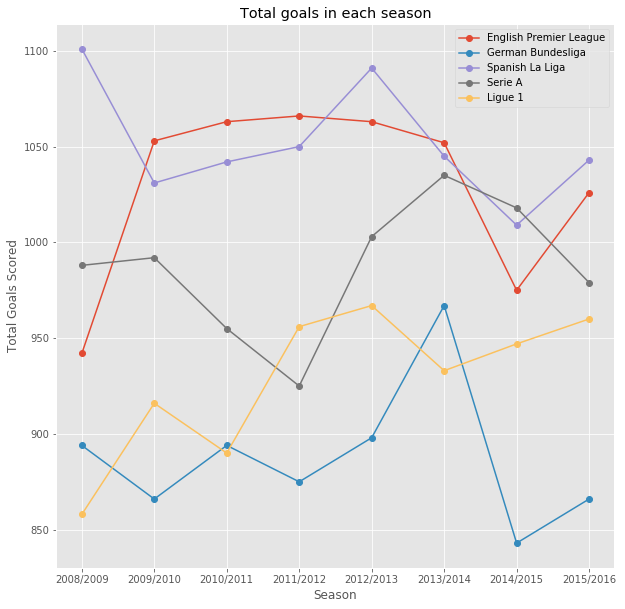

In [61]:
'''We can see that the Spanish teams overall score more than the teams in Premier League and in Bundesliga.
But the total goals in Bundesliga is low due to the fact that only 18 teams compete in the league. 
So each team in Bundesliga plays only 34 matches in a season whereas each team in premier league plays 38 matches. 
So the total games played in Premier League and La Liga is 380 whereas total games played in Bundesliga is 306.'''

fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,english.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,german.total_goals.sum().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,spanish.total_goals.sum().values,label = "Spanish La Liga", marker = 'o')
plt.plot(num_seasons,italy.total_goals.sum().values,label='''Serie A''',marker='o')
plt.plot(num_seasons,france.total_goals.sum().values,label='''Ligue 1''',marker='o')
plt.legend()
seasons

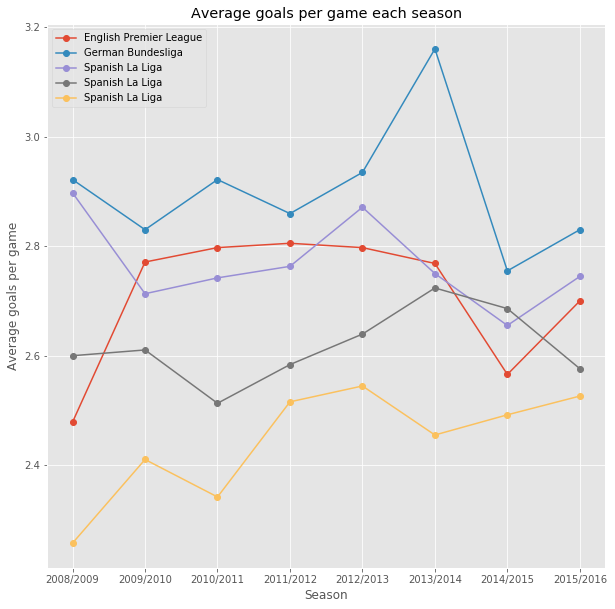

In [69]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,english.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,german.total_goals.mean().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,spanish.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')
plt.plot(num_seasons,italy.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')
plt.plot(num_seasons,france.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')

plt.legend(loc = 2)


# Data preprocessing

In [66]:
loc='C:\\Users\\Priyanka\\Desktop\\Data\\'
raw_data_1 = pd.read_csv(loc + 'EPL 00-01.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_2 = pd.read_csv(loc + 'EPL 01-02.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_3 = pd.read_csv(loc + 'EPL 02-03.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_4 = pd.read_csv(loc + 'EPL 03-04.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_5 = pd.read_csv(loc + 'EPL 04-05.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_6 = pd.read_csv(loc + 'EPL 05-06.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_7 = pd.read_csv(loc + 'EPL 06-07.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_8 = pd.read_csv(loc + 'EPL 07-08.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_9 = pd.read_csv(loc + 'EPL 08-09.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_10 = pd.read_csv(loc + 'EPL 09-10.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_11 = pd.read_csv(loc + 'EPL 10-11.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_12 = pd.read_csv(loc + 'EPL 11-12.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_13 = pd.read_csv(loc + 'EPL 12-13.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_14 = pd.read_csv(loc + 'EPL 13-14.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_15 = pd.read_csv(loc + 'EPL 14-15.csv',usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],parse_dates=['Date'])
raw_data_16 = pd.read_csv(loc + 'EPL 15-16.csv',parse_dates=['Date'],usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR',
                                                        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],)
#raw_data_17 = pd.read_csv(loc + 'EPL 16-17.csv',usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                        'HTR','HS','AS','HST','AST','HF','AF','HC','AC',
                                                        'HY','AY','HR','AR'],parse_dates=['Date'])
#raw_data_18 = pd.read_csv(loc + 'EPL 17-18.csv',usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                        'HTR','HS','AS','HST','AST','HF','AF','HC','AC',
                                                        'HY','AY','HR','AR'],parse_dates=['Date'])
#raw_data_19 = pd.read_csv(loc + 'EPL 18-19.csv',usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                        'HTR','HS','AS','HST','AST','HF','AF','HC','AC',
                                                        'HY','AY','HR','AR'],parse_dates=['Date'])


IndentationError: unexpected indent (<ipython-input-66-03ef5dd0490f>, line 35)

In [57]:
playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,
                          raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,
                          raw_data_15,raw_data_16],ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


FTHG - Full Time Home Goal
FTAG - Half Time Away Goal
FTR - Full Time Result
HTHG - Half Time Home Goal
HTAG - Half Time Away Goal
HTR - Half Time Result
HS - Home Shots
AS - Away Shots
HST - Home Shots on Target
AST - Away Shots on Target
HF - Home Team Foul
AF - Away Team Foul
HC - Home Team Corner
AC - Away Team Corner
HY - Home Team Yellow Card
Ay - Away Team Yellow Card
HR - Home Team Red Card
Ar - Away Team Red Card

In [58]:
playing_stat.to_csv(loc + "Merged_dataset.csv")

In [59]:
df = pd.read_csv(loc + "merged_dataset.csv")

In [60]:
df.head()

,Unnamed: 0,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTAG,FTHG,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam
0,0,6.0,12.0,0.0,8.0,4.0,2.0,Man City,2000-08-19 00:00:00,0.0,4.0,H,6.0,13.0,0.0,17.0,14.0,0.0,2.0,H,1.0,Charlton
1,1,7.0,14.0,0.0,12.0,5.0,2.0,West Ham,2000-08-19 00:00:00,2.0,4.0,H,7.0,19.0,0.0,17.0,10.0,0.0,1.0,H,1.0,Chelsea
2,2,4.0,21.0,0.0,16.0,9.0,3.0,Middlesbrough,2000-08-19 00:00:00,3.0,1.0,A,8.0,15.0,1.0,6.0,3.0,1.0,1.0,D,5.0,Coventry
3,3,8.0,13.0,0.0,13.0,6.0,1.0,Southampton,2000-08-19 00:00:00,2.0,2.0,D,5.0,11.0,0.0,6.0,4.0,2.0,1.0,A,1.0,Derby
4,4,4.0,20.0,0.0,12.0,6.0,3.0,Everton,2000-08-19 00:00:00,0.0,2.0,H,6.0,21.0,0.0,17.0,8.0,0.0,2.0,H,1.0,Leeds


In [61]:
avg_home_scored = df.FTHG.sum() / 6080.0
avg_away_scored = df.FTAG.sum() / 6080.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)

1.522861842105263


In [62]:
#We calculate attacking strength of each team at home and away from goals scored at home and away. 
#We will use this as a feature in our prediction model.
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')
table.Team = res_home.HomeTeam.all().values
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#19 Home matches for each team each season and 16 seasons therefore 304 home matches and 304 away matches
table.HAS = (table.HGS / 304.0) / avg_home_scored
table.AAS = (table.AGS / 304.0) / avg_away_scored
table.HDS = (table.HGC / 304.0) / avg_home_conceded
table.ADS = (table.AGC / 304.0) / avg_away_conceded

table




,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,True,662.0,503.0,1.429960,1.471190,253.0,342.0,0.739982,0.738741
1,True,377.0,341.0,0.814343,0.997368,341.0,501.0,0.997368,1.082190
2,True,162.0,111.0,0.349930,0.324656,140.0,220.0,0.409476,0.475213
3,True,289.0,229.0,0.624257,0.669786,239.0,353.0,0.699035,0.762501
4,True,30.0,25.0,0.064802,0.073121,37.0,41.0,0.108219,0.088562
5,True,278.0,217.0,0.600497,0.634689,260.0,353.0,0.760456,0.762501
6,True,23.0,22.0,0.049681,0.064346,34.0,33.0,0.099444,0.071282
7,True,20.0,10.0,0.043201,0.029248,29.0,41.0,0.084820,0.088562
8,True,39.0,31.0,0.084242,0.090670,51.0,84.0,0.149166,0.181445
9,True,20.0,12.0,0.043201,0.035098,35.0,39.0,0.102369,0.084242


In [64]:


#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table



TypeError: invalid type comparison

In [ ]:
last_row=len(raw_data_15)-1
raw_data_15=raw_data_15.drop(raw_data_15.index[last_row])

In [5]:
FTHG - Full Time Home Goal
FTAG - Half Time Away Goal
FTR - Full Time Result
HTHG - Half Time Home Goal
HTAG - Half Time Away Goal
HTR - Half Time Result
HS - Home Shots
AS - Away Shots
HST - Home Shots on Target
AST - Away Shots on Target
HF - Home Team Foul
AF - Away Team Foul
HC - Home Team Corner
AC - Away Team Corner
HY - Home Team Yellow Card
Ay - Away Team Yellow Card
HR - Home Team Red Card
Ar - Away Team Red Card

SyntaxError: invalid syntax (<ipython-input-5-dcaea4b61ae1>, line 1)

In [44]:
#Get all data related to gameplay
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

raw_data_1 = raw_data_1[columns_req]                      
raw_data_2 = raw_data_2[columns_req]
raw_data_3 = raw_data_3[columns_req]
raw_data_4 = raw_data_4[columns_req]
raw_data_5 = raw_data_5[columns_req]
raw_data_6 = raw_data_6[columns_req]
raw_data_7 = raw_data_7[columns_req]
raw_data_8 = raw_data_8[columns_req]
raw_data_9 = raw_data_9[columns_req]
raw_data_10 = raw_data_10[columns_req]
raw_data_11 = raw_data_11[columns_req]   
raw_data_12 = raw_data_12[columns_req]
raw_data_13 = raw_data_13[columns_req]
raw_data_14 = raw_data_14[columns_req]
raw_data_15 = raw_data_15[columns_req]
raw_data_16 = raw_data_16[columns_req]




In [46]:
raw_data_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2000-08-19,Charlton,Man City,4,0,H
1,2000-08-19,Chelsea,West Ham,4,2,H
2,2000-08-19,Coventry,Middlesbrough,1,3,A
3,2000-08-19,Derby,Southampton,2,2,D
4,2000-08-19,Leeds,Everton,2,0,H
5,2000-08-19,Leicester,Aston Villa,0,0,D
6,2000-08-19,Liverpool,Bradford,1,0,H
7,2000-08-19,Sunderland,Arsenal,1,0,H
8,2000-08-19,Tottenham,Ipswich,3,1,H
9,2000-08-20,Man United,Newcastle,2,0,H


In [32]:
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    team_name = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        team_name[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        team_name[playing_stat.iloc[i].HomeTeam].append(HTGS)
        team_name[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are team_name and cols are matchweek.
    GoalsScored = pd.DataFrame(data=team_name, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by team_name and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    team_name = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        team_name[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        team_name[playing_stat.iloc[i].HomeTeam].append(HTGC)
        team_name[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are team_name and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=team_name, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
raw_data_1 = get_gss(raw_data_1)
raw_data_2 = get_gss(raw_data_2)
raw_data_3 = get_gss(raw_data_3)
raw_data_4 = get_gss(raw_data_4)
raw_data_5 = get_gss(raw_data_5)
raw_data_6 = get_gss(raw_data_6)
raw_data_7 = get_gss(raw_data_7)
raw_data_8 = get_gss(raw_data_8)
raw_data_9 = get_gss(raw_data_9)
raw_data_10 = get_gss(raw_data_10)
raw_data_11 = get_gss(raw_data_11)
raw_data_12 = get_gss(raw_data_12)
raw_data_13 = get_gss(raw_data_13)
raw_data_14 = get_gss(raw_data_14)
raw_data_15 = get_gss(raw_data_15)
raw_data_16 = get_gss(raw_data_16)

In [33]:
raw_data_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,6,6,13,12,1,2,0,0,0,0,0,0
1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,7,7,19,14,1,2,0,0,0,0,0,0
2,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,8,4,15,21,5,3,1,0,0,0,0,0
3,2000-08-19,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,5,8,11,13,1,1,0,0,0,0,0,0
4,2000-08-19,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,6,4,21,20,1,3,0,0,0,0,0,0
5,2000-08-19,Leicester,Aston Villa,0,0,D,0,0,D,5,5,4,3,5,4,12,12,2,3,0,0,0,0,0,0
6,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,16,3,10,2,6,1,8,8,1,1,0,0,0,0,0,0
7,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,8,14,2,7,2,9,10,21,3,1,0,1,0,0,0,0
8,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,20,15,6,5,3,4,14,13,0,0,0,0,0,0,0,0
9,2000-08-20,Man United,Newcastle,2,0,H,1,0,H,19,9,9,6,7,1,7,13,0,1,0,0,0,0,0,0


In [34]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    team_name = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        team_name[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            team_name[playing_stat.iloc[i].HomeTeam].append('W')
            team_name[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            team_name[playing_stat.iloc[i].AwayTeam].append('W')
            team_name[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            team_name[playing_stat.iloc[i].AwayTeam].append('D')
            team_name[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=team_name, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
raw_data_1 = get_agg_points(raw_data_1)
raw_data_2 = get_agg_points(raw_data_2)
raw_data_3 = get_agg_points(raw_data_3)
raw_data_4 = get_agg_points(raw_data_4)
raw_data_5 = get_agg_points(raw_data_5)
raw_data_6 = get_agg_points(raw_data_6)
raw_data_7 = get_agg_points(raw_data_7)
raw_data_8 = get_agg_points(raw_data_8)
raw_data_9 = get_agg_points(raw_data_9)
raw_data_10 = get_agg_points(raw_data_10)
raw_data_11 = get_agg_points(raw_data_11)
raw_data_12 = get_agg_points(raw_data_12)
raw_data_13 = get_agg_points(raw_data_13)
raw_data_14 = get_agg_points(raw_data_14)
raw_data_15 = get_agg_points(raw_data_15)
raw_data_16 = get_agg_points(raw_data_16)

In [36]:
raw_data_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,6,6,13,12,1,2,0,0,0,0,0,0,0,0
1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,7,7,19,14,1,2,0,0,0,0,0,0,0,0
2,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,8,4,15,21,5,3,1,0,0,0,0,0,0,0
3,2000-08-19,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,5,8,11,13,1,1,0,0,0,0,0,0,0,0
4,2000-08-19,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,6,4,21,20,1,3,0,0,0,0,0,0,0,0
5,2000-08-19,Leicester,Aston Villa,0,0,D,0,0,D,5,5,4,3,5,4,12,12,2,3,0,0,0,0,0,0,0,0
6,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,16,3,10,2,6,1,8,8,1,1,0,0,0,0,0,0,0,0
7,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,8,14,2,7,2,9,10,21,3,1,0,1,0,0,0,0,0,0
8,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,20,15,6,5,3,4,14,13,0,0,0,0,0,0,0,0,0,0
9,2000-08-20,Man United,Newcastle,2,0,H,1,0,H,19,9,9,6,7,1,7,13,0,1,0,0,0,0,0,0,0,0


In [19]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(raw_data):
    raw_data = add_form(raw_data,1)
    raw_data = add_form(raw_data,2)
    raw_data = add_form(raw_data,3)
    raw_data = add_form(raw_data,4)
    raw_data = add_form(raw_data,5)
    return raw_data    
    
# Make changes to df
raw_data_1 = add_form_df(raw_data_1)
raw_data_2 = add_form_df(raw_data_2)
raw_data_3 = add_form_df(raw_data_3)
raw_data_4 = add_form_df(raw_data_4)
raw_data_5 = add_form_df(raw_data_5)
raw_data_6 = add_form_df(raw_data_6)
raw_data_7 = add_form_df(raw_data_7)
raw_data_8 = add_form_df(raw_data_8)
raw_data_9 = add_form_df(raw_data_9)
raw_data_10 = add_form_df(raw_data_10)
raw_data_11 = add_form_df(raw_data_11)
raw_data_12 = add_form_df(raw_data_12)
raw_data_13 = add_form_df(raw_data_13)
raw_data_14 = add_form_df(raw_data_14)
raw_data_15 = add_form_df(raw_data_15)    
raw_data_16 = add_form_df(raw_data_16)


In [37]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP']
raw_data_1 = raw_data_1[cols]
raw_data_2 = raw_data_2[cols]
raw_data_3 = raw_data_3[cols]
raw_data_4 = raw_data_4[cols]
raw_data_5 = raw_data_5[cols]
raw_data_6 = raw_data_6[cols]
raw_data_7 = raw_data_7[cols]
raw_data_8 = raw_data_8[cols]
raw_data_9 = raw_data_9[cols]
raw_data_10 = raw_data_10[cols]
raw_data_11 = raw_data_11[cols]
raw_data_12 = raw_data_12[cols]
raw_data_13 = raw_data_13[cols]
raw_data_14 = raw_data_14[cols]
raw_data_15 = raw_data_15[cols]
raw_data_16 = raw_data_16[cols]

In [38]:
Standings = pd.read_csv(loc + "EPLStandings.csv")
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18)

def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][year])
        AwayTeamLP.append(Standings.loc[at][year])
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat
raw_data_1 = get_last(raw_data_1, Standings, 0)
raw_data_2 = get_last(raw_data_2, Standings, 1)
raw_data_3 = get_last(raw_data_3, Standings, 2)
raw_data_4 = get_last(raw_data_4, Standings, 3)
raw_data_5 = get_last(raw_data_5, Standings, 4)
raw_data_6 = get_last(raw_data_6, Standings, 5)
raw_data_7 = get_last(raw_data_7, Standings, 6)
raw_data_8 = get_last(raw_data_8, Standings, 7)
raw_data_9 = get_last(raw_data_9, Standings, 8)
raw_data_10 = get_last(raw_data_10, Standings, 9)
raw_data_11 = get_last(raw_data_11, Standings, 10)
raw_data_12 = get_last(raw_data_12, Standings, 11)
raw_data_13 = get_last(raw_data_13, Standings, 12)
raw_data_14 = get_last(raw_data_14, Standings, 13)
raw_data_15 = get_last(raw_data_15, Standings, 14)
raw_data_16 = get_last(raw_data_16, Standings, 15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

raw_data_1 = get_mw(raw_data_1)
raw_data_2 = get_mw(raw_data_2)
raw_data_3 = get_mw(raw_data_3)
raw_data_4 = get_mw(raw_data_4)
raw_data_5 = get_mw(raw_data_5)
raw_data_6 = get_mw(raw_data_6)
raw_data_7 = get_mw(raw_data_7)
raw_data_8 = get_mw(raw_data_8)
raw_data_9 = get_mw(raw_data_9)
raw_data_10 = get_mw(raw_data_10)
raw_data_11 = get_mw(raw_data_11)
raw_data_12 = get_mw(raw_data_12)
raw_data_13 = get_mw(raw_data_13)
raw_data_14 = get_mw(raw_data_14)
raw_data_15 = get_mw(raw_data_15)
raw_data_16 = get_mw(raw_data_16)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
playing_stat = pd.concat([raw_data_1,
                          raw_data_2,
                          raw_data_3,
                          raw_data_4,
                          raw_data_5,
                          raw_data_6,
                          raw_data_7,
                          raw_data_8,
                          raw_data_9,
                          raw_data_10,
                          raw_data_11,
                          raw_data_12,
                          raw_data_13,
                          raw_data_14,
                          raw_data_15,
                          raw_data_16], ignore_index=True)


In [41]:
# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

KeyError: 'HM1'

In [26]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

# Diff in last year positions
playing_stat['DiffLP'] = playing_stat['HomeTeamLP'] - playing_stat['AwayTeamLP']

In [27]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [28]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

In [29]:
playing_stat

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,2000-08-19 00:00:00,Charlton,Man City,4.0,0.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,18.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0
1,2000-08-19 00:00:00,Chelsea,West Ham,4.0,2.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,5.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-4.0
2,2000-08-19 00:00:00,Coventry,Middlesbrough,1.0,3.0,NH,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,14.0,12.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.0
3,2000-08-19 00:00:00,Derby,Southampton,2.0,2.0,NH,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,16.0,15.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.0
4,2000-08-19 00:00:00,Leeds,Everton,2.0,0.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,3.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-10.0
5,2000-08-19 00:00:00,Leicester,Aston Villa,0.0,0.0,NH,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,8.0,6.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.0
6,2000-08-19 00:00:00,Liverpool,Bradford,1.0,0.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,4.0,17.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-13.0
7,2000-08-19 00:00:00,Sunderland,Arsenal,1.0,0.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,7.0,2.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,5.0
8,2000-08-19 00:00:00,Tottenham,Ipswich,3.0,1.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,10.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-8.0
9,2000-08-20 00:00:00,Man United,Newcastle,2.0,0.0,H,0.0,0.0,0.0,0.0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,11.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-10.0
